In [1]:
import os
import glob
import pickle
import numpy as np

import matplotlib.pyplot as plt

from custom_gen import StyleGANGenerator
import cv2

In [2]:
_stylegan_ffhq_f_gdrive_url = 'https://nvlabs-fi-cdn.nvidia.com/stylegan2/networks/stylegan2-ffhq-config-f.pkl'

rnd = np.random.RandomState()
gen = StyleGANGenerator(_stylegan_ffhq_f_gdrive_url)

Setting up TensorFlow plugin "fused_bias_act.cu": Preprocessing... Loading... Done.
Setting up TensorFlow plugin "upfirdn_2d.cu": Preprocessing... Loading... Done.


In [18]:
feature_direction_file = glob.glob('feature_direction_eyeglasses_tanh_normalized.pkl')[0]
with open(feature_direction_file, 'rb') as f:
    feature_direction_dict = pickle.load(f)

feature_direction = feature_direction_dict['direction']
feature_names = np.array(feature_direction_dict['name'])

In [29]:
latents = rnd.randn(10, *gen.Gs.input_shape[1:])
imgs1 = gen.get_images(latents)
imgs2 = gen.get_images(latents + feature_direction[:, 0])

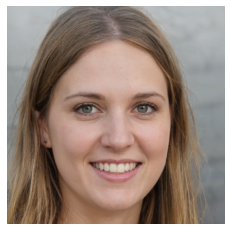

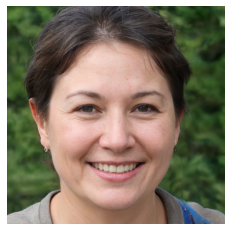

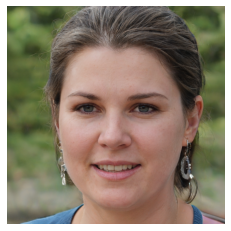

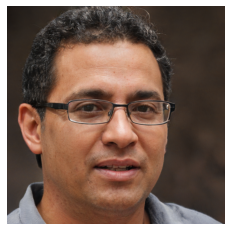

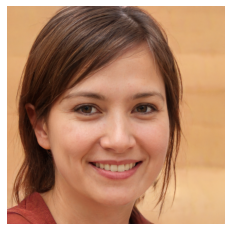

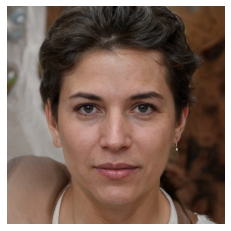

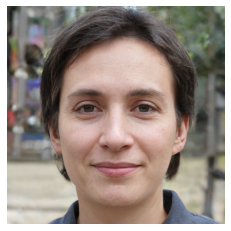

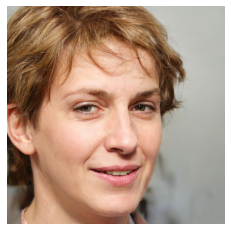

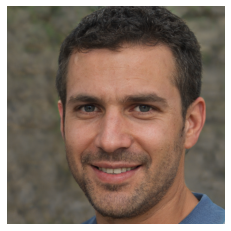

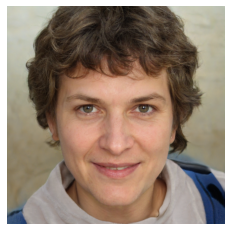

In [30]:
for img in imgs1:
    plt.axis("off")
    plt.imshow(img/255)
    plt.show()

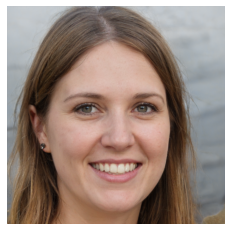

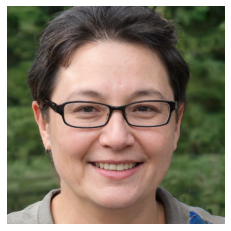

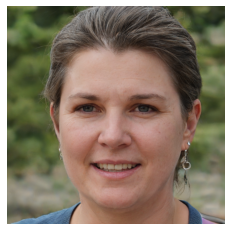

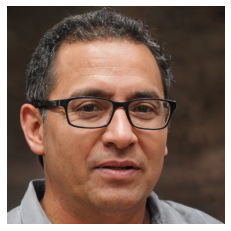

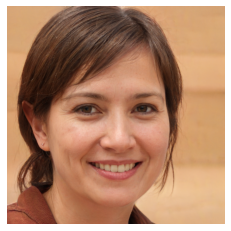

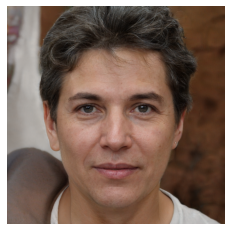

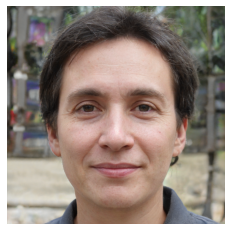

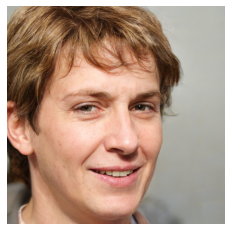

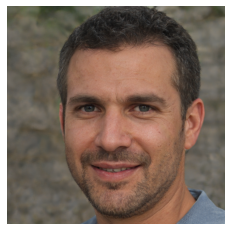

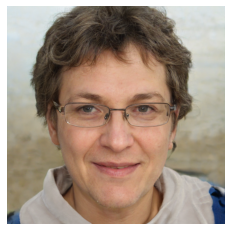

In [31]:
for img in imgs2:
    plt.axis("off")
    plt.imshow(img/255)
    plt.show()

In [22]:
feature_names

array('Eyeglasses', dtype='<U10')

In [42]:
for i, img in enumerate(imgs2):
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    #img = cv2.resize(img, (256,256), interpolation=cv2.INTER_LANCZOS4)
    cv2.imwrite('1024-beard-generated-' + str(i) + '.png', img)

In [43]:
for i, img in enumerate(imgs1):
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    #img = cv2.resize(img, (256,256), interpolation=cv2.INTER_LANCZOS4)
    cv2.imwrite('1024-beard-real-' + str(i) + '.png', img)

In [28]:
feature_direction[:, 0]

array([-5.27004898e-02,  1.85185347e-02, -7.47409151e-03,  6.73905572e-03,
        8.70405463e-02,  5.84928798e-03,  6.88120459e-03, -3.30713318e-02,
       -1.03801042e-01, -1.13916429e-02, -9.44845184e-03,  4.07560405e-02,
       -2.74093317e-02, -4.95501572e-02, -1.73587154e-02,  5.70578463e-03,
       -1.02620474e-02,  5.36550827e-02, -1.24304323e-02,  1.98986865e-02,
       -1.02768695e-02,  1.07413931e-02, -2.50721207e-02, -2.20727734e-02,
       -2.94497833e-02, -1.96147849e-02,  1.99841645e-02, -7.82976341e-03,
        2.62722765e-02, -7.96216336e-03,  7.28094972e-02,  6.11429196e-02,
        1.27691418e-02, -2.97615861e-02,  2.72957018e-02,  1.42105807e-02,
        3.42417558e-02,  2.81868567e-02, -2.92177773e-02, -3.87214542e-02,
        6.31878108e-03, -5.27019312e-04,  7.78483037e-03,  2.55239568e-02,
        3.69718601e-02, -4.88610578e-02,  8.06712262e-03, -1.50467606e-02,
        4.17003765e-02,  1.90393989e-02, -3.53549759e-02,  5.16317532e-04,
       -5.13435028e-02,  